In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
Temp_Data = pd.read_csv("Celsius-to-Fahrenheit.csv")

In [3]:
Temp_Data.columns

Index(['Celsius', 'Fahrenheit'], dtype='object')

In [4]:
Temp_Data.shape

(30, 2)

In [5]:
Temp_Data.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [6]:
Temp_Data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Celsius       30 non-null int64
Fahrenheit    30 non-null float64
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


In [7]:
Temp_Data.isna().count() # No null value found

Celsius       30
Fahrenheit    30
dtype: int64

In [8]:
Temp_Data.describe() # basic stats

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


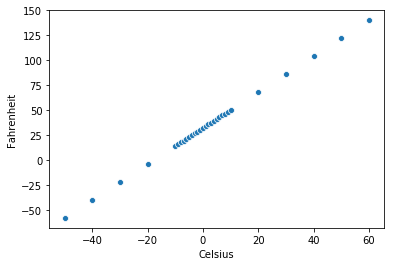

In [9]:
sns.scatterplot(x='Celsius',y='Fahrenheit',data=Temp_Data) # relation between x and y

In [10]:
X_train = Temp_Data['Celsius']
Y_train = Temp_Data['Fahrenheit'] # split in to x and y for trainig phaswe

In [11]:
model = keras.Sequential()

In [13]:
model.add(keras.layers.Dense(units=8,input_shape=[1]))
model.add(keras.layers.Dense(units=32))
model.add(keras.layers.Dense(units=1))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer=keras.optimizers.Adam(0.5),loss='mean_squared_error')

In [16]:
epoch_history = model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
30/30 [==============================] - 0s 7ms/sample - loss: 2130.6030
Epoch 2/50
30/30 [==============================] - 0s 42us/sample - loss: 854749.0000
Epoch 3/50
30/30 [==============================] - 0s 28us/sample - loss: 203117.4531
Epoch 4/50
30/30 [==============================] - 0s 32us/sample - loss: 23183.0625
Epoch 5/50
30/30 [==============================] - 0s 30us/sample - loss: 178205.6094
Epoch 6/50
30/30 [==============================] - 0s 29us/sample - loss: 172458.9375
Epoch 7/50
30/30 [==============================] - 0s 36us/sample - loss: 4295.0439
Epoch 8/50
30/30 [==============================] - 0s 37us/sample - loss: 319968.6562
Epoch 9/50
30/30 [==============================] - 0s 31us/sample - loss: 257000.7344
Epoch 10/50
30/30 [==============================] - 0s 35us/sample - loss: 29493.3477
Epoch 11/50
30/30 [==============================] - 0s 83us/sample - loss: 2030.7552
Epoch 12/50
30/30 [==============================]

In [17]:
history = epoch_history.history.keys()

In [18]:
history

dict_keys(['loss'])

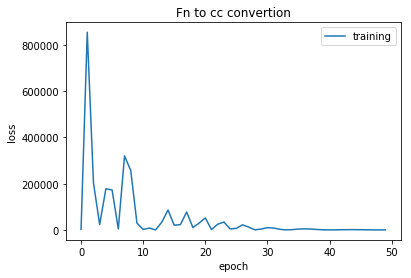

In [19]:
plt.plot(epoch_history.history['loss'])
plt.title('Fn to cc convertion')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training'])

In [20]:
model.predict([0,3])

array([[31.186811],
       [34.43819 ]], dtype=float32)

In [21]:
model.get_weights()

[array([[ 0.5163747 , -0.19069661, -0.54567826,  0.625249  , -0.01211531,
          0.15942399, -0.24231635,  0.6136475 ]], dtype=float32),
 array([ 0.20705166, -1.0981958 , -1.8594143 ,  1.5449784 , -1.0570468 ,
         1.0489342 , -1.2298415 ,  0.55685365], dtype=float32),
 array([[-1.3483208 , -1.2864475 , -1.1999809 ,  0.8903197 , -0.93908787,
          1.1005361 ,  1.3877932 ,  1.0878557 ,  1.3788686 , -1.1796896 ,
         -1.1561168 ,  1.0252061 ,  0.7735977 , -1.0217502 , -0.9017707 ,
          1.9976215 ,  0.7937752 , -1.2255393 , -1.4210353 , -1.5851278 ,
          1.0357296 ,  0.96714634, -1.1892927 ,  1.1966027 ,  0.9210705 ,
          1.3586881 , -1.3083532 , -1.1851883 ,  1.3405727 , -1.2973619 ,
         -1.5732287 ,  1.1550494 ],
        [-1.3014017 , -0.44333905, -0.5821482 ,  0.622925  , -0.14728707,
          0.39427632,  0.7442731 ,  0.49505547,  0.7360283 , -0.45807648,
         -0.8819368 ,  0.05872751,  0.06424218, -0.37442055, -0.44084224,
          1.1376386 ,

In [22]:
model.save('Fn_to_cc')

In [12]:
X_train1= X_train.values.reshape(-1,1)

In [13]:
Y_train1= Y_train.values.reshape(-1,1)

In [14]:
Regressor = LinearRegression(fit_intercept=True)

In [19]:
Regressor.fit(X_train1,Y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
Regressor.coef_

array([[1.8]])

In [22]:
Regressor.intercept_


array([32.])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

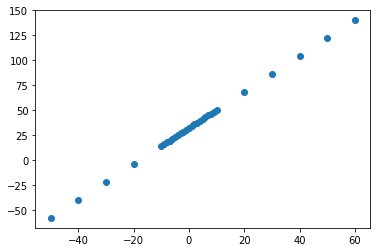

In [23]:
plt.scatter(X_train1,Y_train1)
plt.plot